In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, precision_recall_curve

In [44]:
cancer_data = pd.read_csv('../Data/cancer.csv')
print("Data Berhasil")
print(f"Jumlah sampel: {len(df)}")
print(f"Jumlah fitur: {len(df.columns)-2}")
print("\nStruktur data:")
print(df.head())

Data Berhasil
Jumlah sampel: 569
Jumlah fitur: 29

Struktur data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension 

In [47]:
print("\nLangkah 2: Persiapan Data...")
X = df.drop('target', axis=1)
y = df['target']

# Split data dengan rasio berbeda
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,
    random_state=123,
    stratify=y
)

print(f" Data Training: {X_train.shape[0]} sampel")
print(f" Data Testing: {X_test.shape[0]} sampel")



Langkah 2: Persiapan Data...
 Data Training: 426 sampel
 Data Testing: 143 sampel


In [55]:
print("\nLangkah 3: Membangun Model Naive Bayes...")
nb_classifier = GaussianNB()

print(" Melatih model...")
nb_classifier.fit(X_train, y_train)

print(" Melakukan prediksi...")
y_pred = nb_classifier.predict(X_test)
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

print(" Model berhasil dilatih dan diuji.")


Langkah 3: Membangun Model Naive Bayes...
 Melatih model...
 Melakukan prediksi...
 Model berhasil dilatih dan diuji.


In [56]:
print("\n" + "="*50)
print("HASIL EVALUASI MODEL")
print("="*50)

accuracy = accuracy_score(y_test, y_pred)
print(f" AKURASI MODEL: {accuracy:.2%}")

print("\n LAPORAN KLASIFIKASI DETAIL:")
report = classification_report(y_test, y_pred, target_names=['Ganas', 'Jinak'], output_dict=True)
print(classification_report(y_test, y_pred, target_names=['Ganas', 'Jinak']))



HASIL EVALUASI MODEL
 AKURASI MODEL: 94.41%

 LAPORAN KLASIFIKASI DETAIL:
              precision    recall  f1-score   support

       Ganas       0.94      0.91      0.92        53
       Jinak       0.95      0.97      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



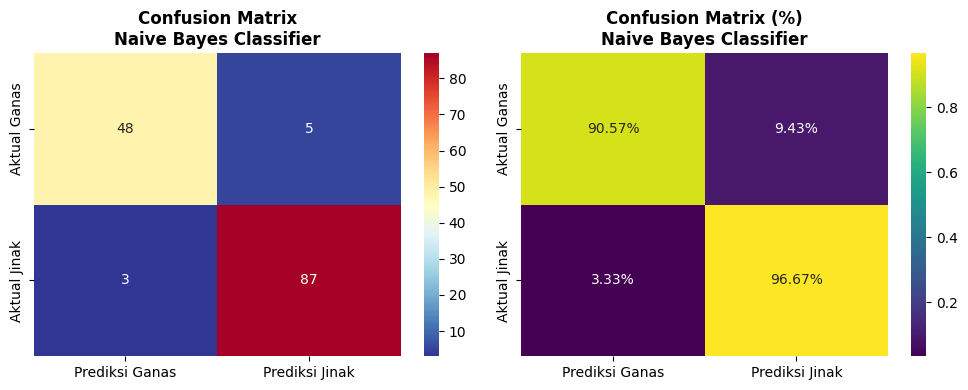

In [57]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlBu_r', 
            xticklabels=['Prediksi Ganas', 'Prediksi Jinak'],
            yticklabels=['Aktual Ganas', 'Aktual Jinak'])
plt.title('Confusion Matrix\nNaive Bayes Classifier', fontweight='bold')

plt.subplot(1, 2, 2)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='viridis',
            xticklabels=['Prediksi Ganas', 'Prediksi Jinak'],
            yticklabels=['Aktual Ganas', 'Aktual Jinak'])
plt.title('Confusion Matrix (%)\nNaive Bayes Classifier', fontweight='bold')

plt.tight_layout()
plt.show()

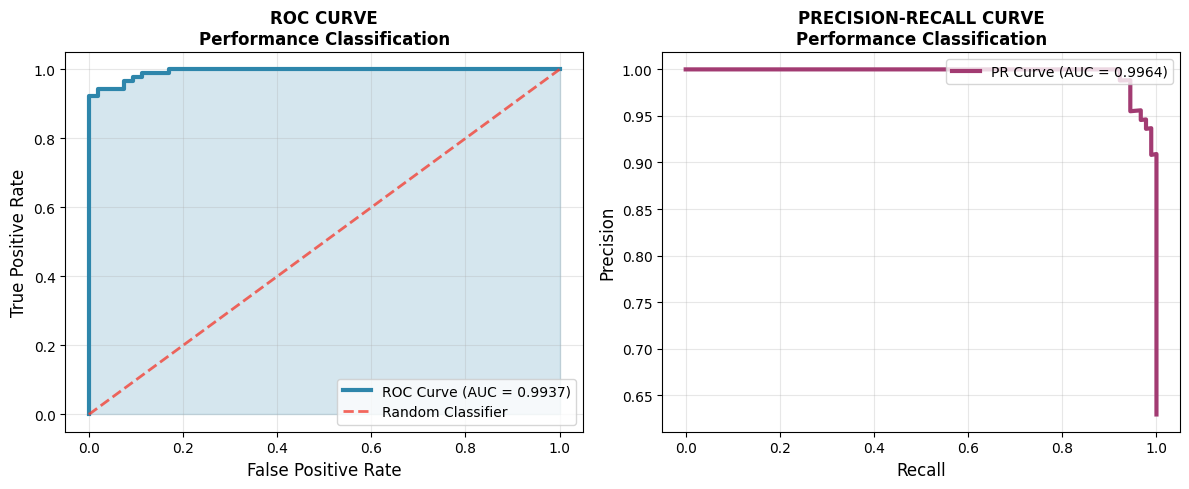

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='#2E86AB', lw=3, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='#F24236', lw=2, linestyle='--', alpha=0.8, label='Random Classifier')
plt.fill_between(fpr, tpr, alpha=0.2, color='#2E86AB')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC CURVE\nPerformance Classification', fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, color='#A23B72', lw=3, label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('PRECISION-RECALL CURVE\nPerformance Classification', fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [63]:
results_df = pd.DataFrame({
    'Aktual': y_test.values,
    'Prediksi': y_pred,
    'Probabilitas_Jinak': y_prob
}).head(10)

print(" Contoh 10 Prediksi Pertama:")
print(results_df)

print(f"\n📈 RINGKASAN PERFORMANCE:")
print(f"   • Akurasi: {accuracy:.2%}")
print(f"   • AUC-ROC: {roc_auc:.4f}")
print(f"   • AUC-PR: {pr_auc:.4f}")
print(f"   • True Positive: {cm[1,1]}")
print(f"   • True Negative: {cm[0,0]}")
print(f"   • False Positive: {cm[0,1]}")
print(f"   • False Negative: {cm[1,0]}")

print("\n Analisis selesai! Model Naive Bayes menunjukkan performa yang baik dalam klasifikasi kanker.")

 Contoh 10 Prediksi Pertama:
   Aktual  Prediksi  Probabilitas_Jinak
0       0         0        3.685102e-28
1       1         1        9.991093e-01
2       1         1        8.307969e-01
3       1         1        1.000000e+00
4       1         1        1.000000e+00
5       0         0       2.828364e-121
6       1         1        1.000000e+00
7       1         1        9.999670e-01
8       0         0        3.932217e-75
9       1         1        1.000000e+00

📈 RINGKASAN PERFORMANCE:
   • Akurasi: 94.41%
   • AUC-ROC: 0.9937
   • AUC-PR: 0.9964
   • True Positive: 87
   • True Negative: 48
   • False Positive: 5
   • False Negative: 3

 Analisis selesai! Model Naive Bayes menunjukkan performa yang baik dalam klasifikasi kanker.
